Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:               LWKLYWGE   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                 1.709e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:48:30   Log-Likelihood:                -74182.
No. Observations:               82790   AIC:                         1.484e+05
Df Residuals:                   82788   BIC:                         1.484e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

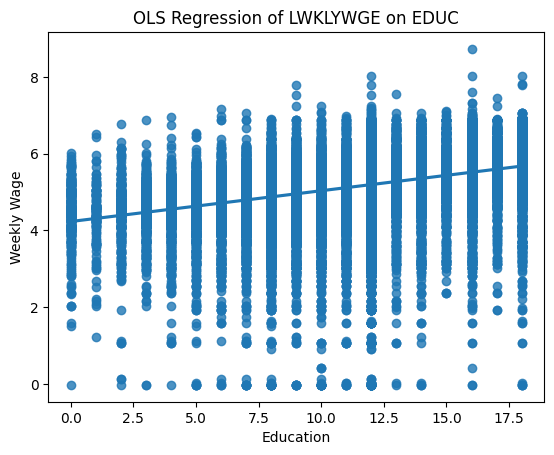

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read CSV files
census_70 = pd.read_csv('/content/drive/MyDrive/census_70 (raw data).csv')
census_80 = pd.read_csv('/content/drive/MyDrive/census_80 (raw data).csv')

# Clean missing values
census_70.dropna(inplace=True)
census_80.dropna(inplace=True)

# Perform OLS regression on EDUC and LWKLYWGE in census_70
X = census_70['EDUC']
y = census_70['LWKLYWGE']
X = sm.add_constant(X)  # Add a constant term
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())

# Plot the regression results
sns.regplot(x='EDUC', y='LWKLYWGE', data=census_70, ci=None)
plt.title('OLS Regression of LWKLYWGE on EDUC')
plt.xlabel('Education')
plt.ylabel('Weekly Wage')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:               LWKLYWGE   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                 7.008e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:48:41   Log-Likelihood:            -7.8684e+05
No. Observations:              816435   AIC:                         1.574e+06
Df Residuals:                  816433   BIC:                         1.574e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

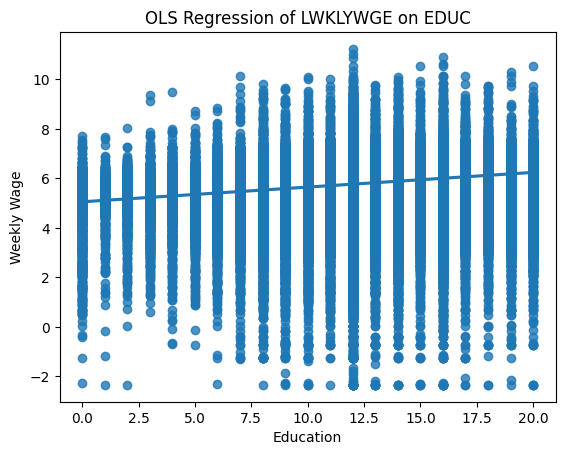

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read CSV files
census_70 = pd.read_csv('/content/drive/MyDrive/census_70 (raw data).csv')
census_80 = pd.read_csv('/content/drive/MyDrive/census_80 (raw data).csv')

# Clean missing values
census_70.dropna(inplace=True)
census_80.dropna(inplace=True)

# Perform OLS regression on EDUC and LWKLYWGE in census_70
X = census_80['EDUC']
y = census_80['LWKLYWGE']
X = sm.add_constant(X)  # Add a constant term
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())

# Plot the regression results
sns.regplot(x='EDUC', y='LWKLYWGE', data=census_80, ci=None)
plt.title('OLS Regression of LWKLYWGE on EDUC')
plt.xlabel('Education')
plt.ylabel('Weekly Wage')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First Stage Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   EDUC   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.16
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.69e-10
Time:                        23:04:59   Log-Likelihood:            -2.1777e+05
No. Observations:               82790   AIC:                         4.356e+05
Df Residuals:                   82786   BIC:                         4.356e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

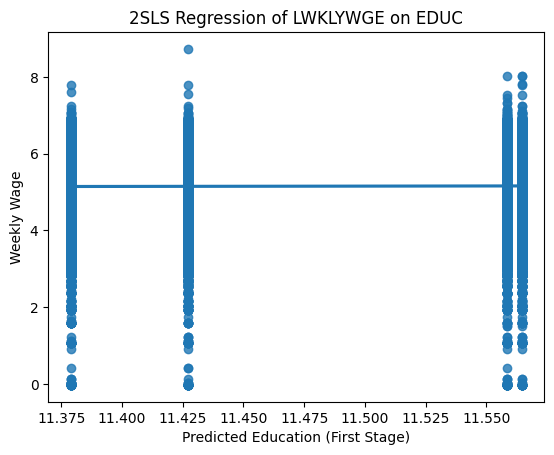

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read CSV files
census_70 = pd.read_csv('/content/drive/MyDrive/census_70 (raw data).csv')
census_80 = pd.read_csv('/content/drive/MyDrive/census_80 (raw data).csv')

# Clean missing values
census_70.dropna(inplace=True)
census_80.dropna(inplace=True)

# Create dummy variables for QOB and set QOB=4 as the base category
census_70 = pd.get_dummies(census_70, columns=['QOB'], drop_first=False)
census_70.drop('QOB_4', axis=1, inplace=True)

# 2SLS: First Stage
first_stage_formula = 'EDUC ~ ' + ' + '.join([f'QOB_{i}' for i in range(1, 4)])
first_stage = smf.ols(first_stage_formula, data=census_70).fit()
census_70['EDUC_hat'] = first_stage.fittedvalues

# Display first stage regression results
print("First Stage Regression Results:")
print(first_stage.summary())

# 2SLS: Second Stage
second_stage = smf.ols('LWKLYWGE ~ EDUC_hat', data=census_70).fit()

# Display second stage regression results
print("\nSecond Stage Regression Results:")
print(second_stage.summary())

# Plot the regression results
sns.regplot(x='EDUC_hat', y='LWKLYWGE', data=census_70, ci=None)
plt.title('2SLS Regression of LWKLYWGE on EDUC')
plt.xlabel('Predicted Education (First Stage)')
plt.ylabel('Weekly Wage')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First Stage Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   EDUC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     76.12
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           3.16e-49
Time:                        22:49:31   Log-Likelihood:            -2.0899e+06
No. Observations:              816435   AIC:                         4.180e+06
Df Residuals:                  816431   BIC:                         4.180e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      

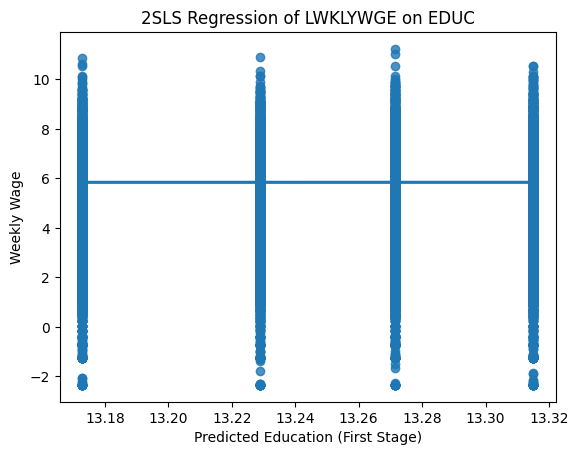

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read CSV files
census_70 = pd.read_csv('/content/drive/MyDrive/census_70 (raw data).csv')
census_80 = pd.read_csv('/content/drive/MyDrive/census_80 (raw data).csv')

# Clean missing values
census_70.dropna(inplace=True)
census_80.dropna(inplace=True)

# Create dummy variables for QOB and set QOB=4 as the base category
census_80 = pd.get_dummies(census_80, columns=['QOB'], drop_first=False)
census_80.drop('QOB_4', axis=1, inplace=True)

# 2SLS: First Stage
first_stage_formula = 'EDUC ~ ' + ' + '.join([f'QOB_{i}' for i in range(1, 4)])
first_stage = smf.ols(first_stage_formula, data=census_80).fit()
census_80['EDUC_hat'] = first_stage.fittedvalues

# Display first stage regression results
print("First Stage Regression Results:")
print(first_stage.summary())

# 2SLS: Second Stage
second_stage = smf.ols('LWKLYWGE ~ EDUC_hat', data=census_80).fit()

# Display second stage regression results
print("\nSecond Stage Regression Results:")
print(second_stage.summary())

# Plot the regression results
sns.regplot(x='EDUC_hat', y='LWKLYWGE', data=census_80, ci=None)
plt.title('2SLS Regression of LWKLYWGE on EDUC')
plt.xlabel('Predicted Education (First Stage)')
plt.ylabel('Weekly Wage')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:                   EDUC   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1486.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:29:14   Log-Likelihood:            -2.1563e+05
No. Observations:               82790   AIC:                         4.313e+05
Df Residuals:                   82786   BIC:                         4.313e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

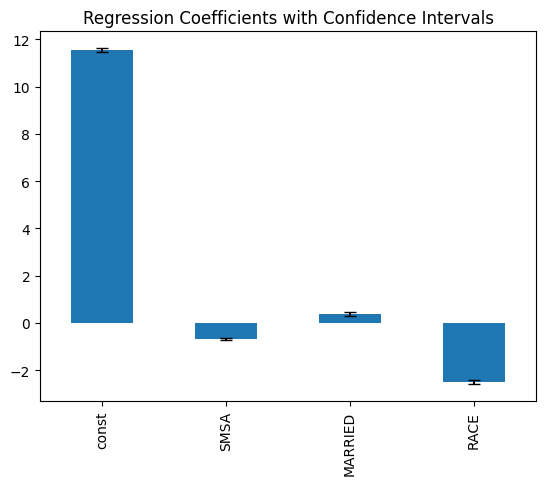

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Mount Google Drive (specific to Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV files from Google Drive
census_70 = pd.read_csv('/content/drive/MyDrive/census_70 (raw data).csv')
census_80 = pd.read_csv('/content/drive/MyDrive/census_80 (raw data).csv')

# Clean missing values
census_70 = census_70.dropna()
census_80 = census_80.dropna()

# Perform regression on census_70
# SMSA, Married, and RACE are treated as dummy variables
X = census_70[['SMSA', 'MARRIED', 'RACE']]
y = census_70['EDUC']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Plotting the coefficients and their confidence intervals
coef = model.params
ci = model.conf_int()
errors = ci[1].sub(ci[0]).div(2)

fig, ax = plt.subplots()
coef.plot(kind='bar', ax=ax, yerr=errors, capsize=4)
plt.title('Regression Coefficients with Confidence Intervals')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:                   EDUC   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9488.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:30:33   Log-Likelihood:            -2.0761e+06
No. Observations:              816435   AIC:                         4.152e+06
Df Residuals:                  816431   BIC:                         4.152e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

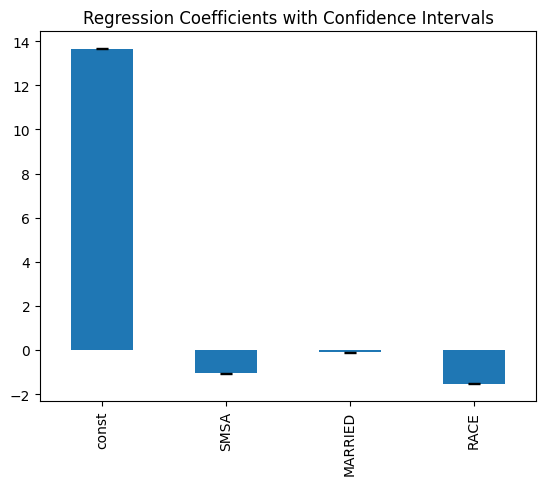

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Mount Google Drive (specific to Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV files from Google Drive
census_70 = pd.read_csv('/content/drive/MyDrive/census_70 (raw data).csv')
census_80 = pd.read_csv('/content/drive/MyDrive/census_80 (raw data).csv')

# Clean missing values
census_70 = census_70.dropna()
census_80 = census_80.dropna()

# Perform regression on census_70
# SMSA, Married, and RACE are treated as dummy variables
X = census_80[['SMSA', 'MARRIED', 'RACE']]
y = census_80['EDUC']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Plotting the coefficients and their confidence intervals
coef = model.params
ci = model.conf_int()
errors = ci[1].sub(ci[0]).div(2)

fig, ax = plt.subplots()
coef.plot(kind='bar', ax=ax, yerr=errors, capsize=4)
plt.title('Regression Coefficients with Confidence Intervals')
plt.show()